In [4]:
!pip install duckduckgo_search
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.8/232.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 14.3 MB/s eta 0:00:00


In [5]:
from duckduckgo_search import ddg_images
from fastbook import *
from fastcore.all import *
from time import sleep
from fastai.vision.widgets import *

In [6]:
snakes = ["White-lipped Pit Viper",
          "Many-banded Krait",
          "Chinese Green Snake",
          "Chinese Green Tree Viper",
          "Chinese Cobra",
          "Yellow-spotted Keelback",
          "Banded Krait",
          "Common Mock Viper",
          "Oriental Ratsnake",
          "Buff Striped Keelback",
          "Burmese Python",
          "King Cobra",
          "Golden Tree Snake",
          "Oriental Whipsnake",
          "Reticulated Python",
          "Small-banded Kukri Snake",
          "Kramer’s Pit Viper",
          "Indo-Chinese Rat Snake",
          "Painted Bronzeback",
          "Copperhead Rat Snake",
          "Malayan Pit Viper",
          "Brahminy Blindsnake"]

path = Path('snakes')

In [4]:
# if not path.exists():
#   path.mkdir()
#   for i in snakes:
#     dest = (path/i)
#     dest.mkdir(exist_ok=True)
#     results = search_images_ddg(i, max_images=150)
#     download_images(dest, urls=results)
#     sleep(10)

In [4]:
fns = get_image_files(path)
len(fns)

2272

In [5]:
failed = verify_images(fns)
len(failed)

0

In [6]:
failed.map(Path.unlink);

In [26]:
snakes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=10),
    get_y=parent_label,
    item_tfms = Resize(128)
)

In [27]:
dls = snakes.dataloaders(path)

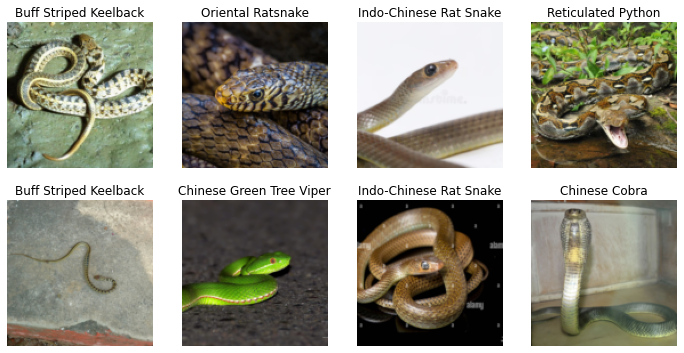

In [28]:
dls.valid.show_batch(max_n=8, nrows=2)

In [29]:
snakes = snakes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

dls=snakes.dataloaders(path)

In [28]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

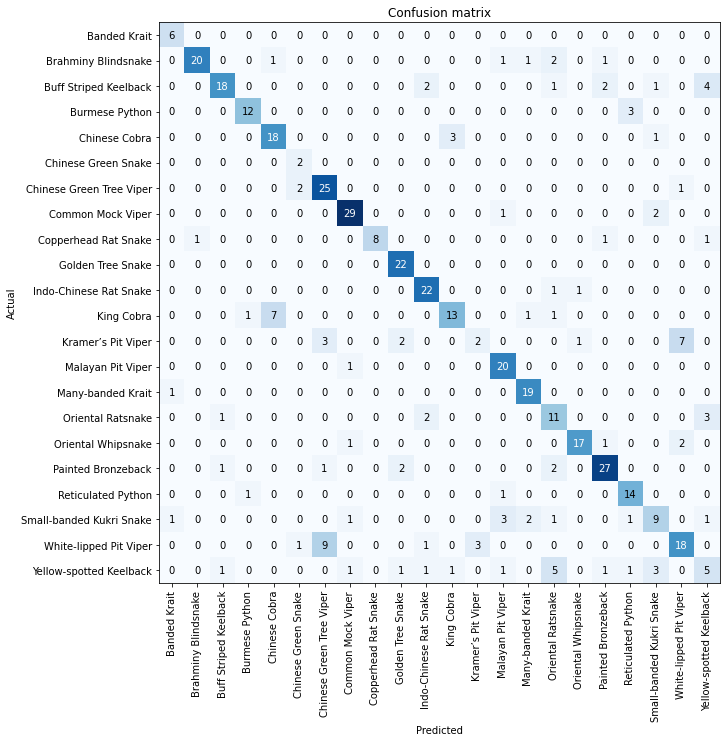

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,15))

In [13]:
bad_cats = interp.most_confused(min_val=2)

In [14]:
bad_cats

[('White-lipped Pit Viper', 'Chinese Green Tree Viper', 9),
 ('King Cobra', 'Chinese Cobra', 7),
 ('Kramer’s Pit Viper', 'White-lipped Pit Viper', 7),
 ('Yellow-spotted Keelback', 'Oriental Ratsnake', 5),
 ('Buff Striped Keelback', 'Yellow-spotted Keelback', 4),
 ('Burmese Python', 'Reticulated Python', 3),
 ('Chinese Cobra', 'King Cobra', 3),
 ('Kramer’s Pit Viper', 'Chinese Green Tree Viper', 3),
 ('Oriental Ratsnake', 'Yellow-spotted Keelback', 3),
 ('Small-banded Kukri Snake', 'Malayan Pit Viper', 3),
 ('White-lipped Pit Viper', 'Kramer’s Pit Viper', 3),
 ('Yellow-spotted Keelback', 'Small-banded Kukri Snake', 3),
 ('Brahminy Blindsnake', 'Oriental Ratsnake', 2),
 ('Buff Striped Keelback', 'Indo-Chinese Rat Snake', 2),
 ('Buff Striped Keelback', 'Painted Bronzeback', 2),
 ('Chinese Green Tree Viper', 'Chinese Green Snake', 2),
 ('Common Mock Viper', 'Small-banded Kukri Snake', 2),
 ('Kramer’s Pit Viper', 'Golden Tree Snake', 2),
 ('Oriental Ratsnake', 'Indo-Chinese Rat Snake', 2),


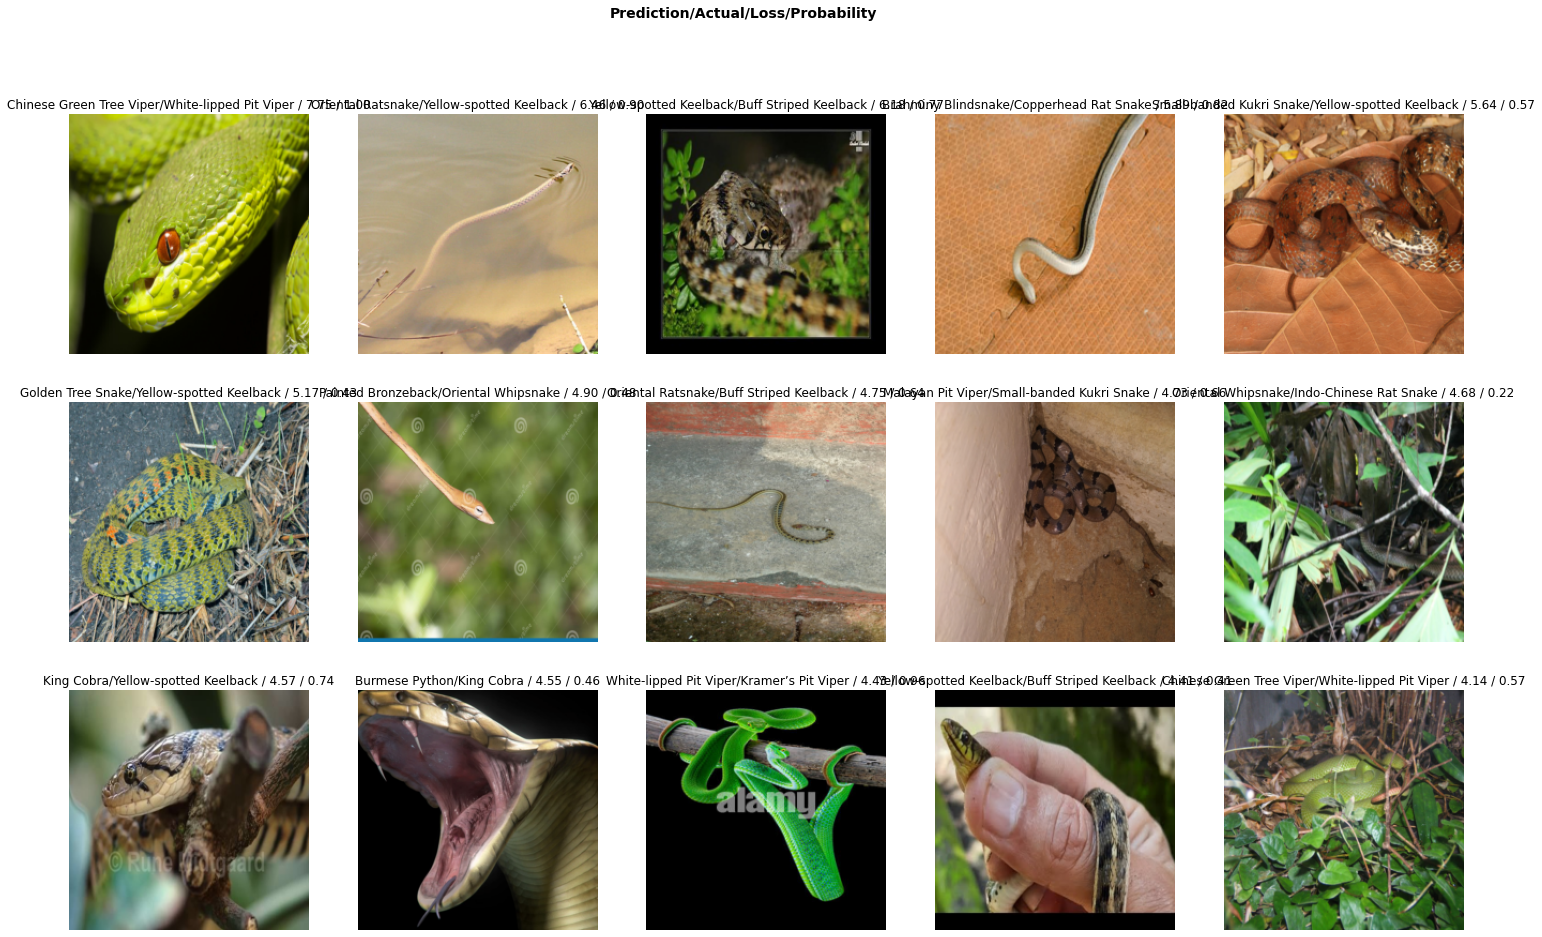

In [15]:
interp.plot_top_losses(15, nrows=3, figsize=(25, 15))

In [29]:
#earn.save('snakes-v1-717726.pkl')
learn.export()

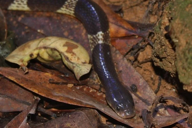

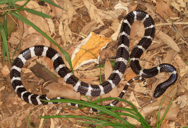

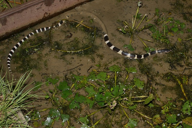

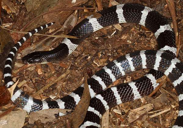

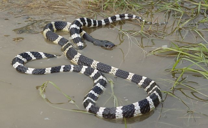

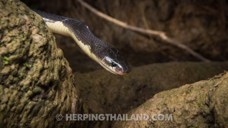

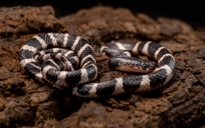

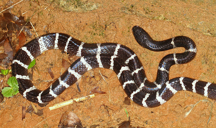

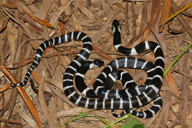

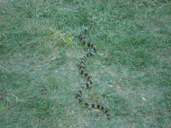

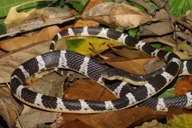

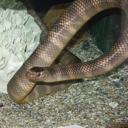

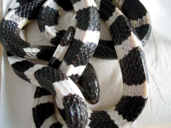

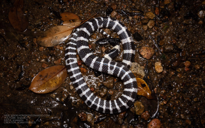

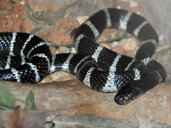

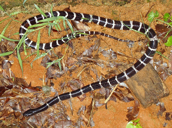

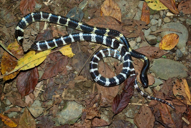

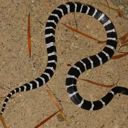

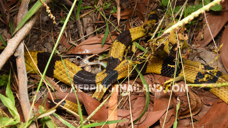

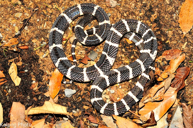

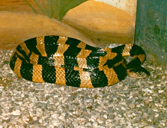

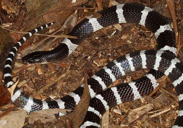

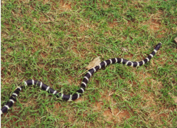

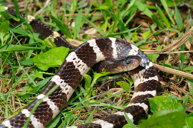

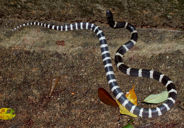

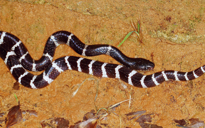

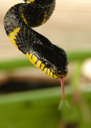

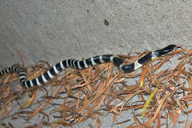

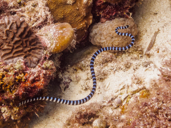

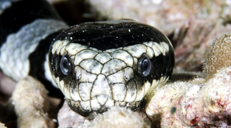

In [18]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [16]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# fns = get_image_files(path)
# len(fns)

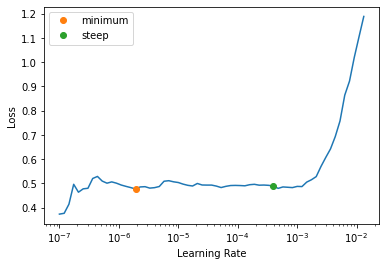

In [18]:
#lr_min,lr_steep = learn.lr_find()

lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [19]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.91e-07, steepest point: 3.98e-04


In [25]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

In [22]:
learn.unfreeze()

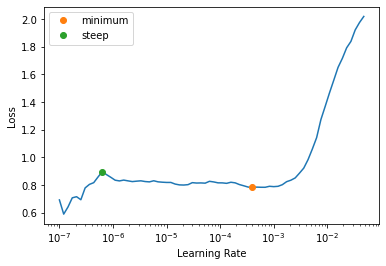

In [23]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [24]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 3.98e-05, steepest point: 6.31e-07


In [ ]:
learn.fit_one_cycle(6, lr_max=3e-5)

In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))


In [ ]:
#learn.save('model_1')
learn.export()

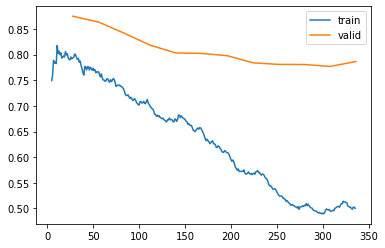

In [30]:
learn.recorder.plot_loss()

In [ ]:
# !pip install fastai2
# from fastai2.callback.fp16 import *
# learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16() 
# learn.fine_tune(6, freeze_epochs=3)

Path('.')

In [ ]:
learn.export()

In [7]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [32]:
img_pred = path/'/notebooks/snakes/White-lipped Pit Viper/3dc8872a-f9fb-4732-9966-980e06a9fc10.jpg'
learn_inf.predict(img_pred)


('White-lipped Pit Viper',
 TensorBase(20),
 TensorBase([2.7171e-05, 1.9894e-06, 1.3563e-06, 3.3882e-05, 3.8519e-05, 4.9804e-04, 9.8256e-03, 2.9991e-05, 4.7864e-05, 1.1171e-04, 3.7452e-06, 1.4621e-05, 3.0275e-02, 3.9218e-06, 3.9528e-06,
             1.8004e-06, 4.1496e-05, 5.0974e-05, 2.3660e-05, 1.4426e-06, 9.5892e-01, 4.4758e-05]))

In [33]:
def classify_snake(image):
    pred, idx, probs = learn_inf.predict(image)
    return dict(zip(dls.vocab, map(float,probs)))
    #return pred

In [34]:
classify_snake(img_pred)

{'Banded Krait': 2.717058487178292e-05,
 'Brahminy Blindsnake': 1.989436213989393e-06,
 'Buff Striped Keelback': 1.356331040369696e-06,
 'Burmese Python': 3.388225377420895e-05,
 'Chinese Cobra': 3.851912697427906e-05,
 'Chinese Green Snake': 0.0004980357480235398,
 'Chinese Green Tree Viper': 0.009825577028095722,
 'Common Mock Viper': 2.9991146220709197e-05,
 'Copperhead Rat Snake': 4.786373028764501e-05,
 'Golden Tree Snake': 0.0001117108840844594,
 'Indo-Chinese Rat Snake': 3.745174808500451e-06,
 'King Cobra': 1.462053205614211e-05,
 'Kramer’s Pit Viper': 0.03027462214231491,
 'Malayan Pit Viper': 3.921811639884254e-06,
 'Many-banded Krait': 3.952785846195184e-06,
 'Oriental Ratsnake': 1.8003595414484153e-06,
 'Oriental Whipsnake': 4.149591040913947e-05,
 'Painted Bronzeback': 5.097405664855614e-05,
 'Reticulated Python': 2.3659718863200396e-05,
 'Small-banded Kukri Snake': 1.4426080952034681e-06,
 'White-lipped Pit Viper': 0.9589189887046814,
 'Yellow-spotted Keelback': 4.4758413

In [59]:
img = PILImage.create(path/'/notebooks/snakes/Reticulated Python/10c18655-444f-41a3-a0a4-12552690f96c.jpg')

('Reticulated Python',
 TensorBase(18),
 TensorBase([6.3705e-08, 1.0705e-09, 3.2944e-10, 1.7326e-05, 3.7841e-09, 1.1969e-08, 3.7490e-09, 3.4613e-11, 1.3968e-08, 4.4860e-09, 9.7234e-10, 5.3006e-09, 1.3806e-09, 1.1019e-08, 4.5119e-09,
             2.2252e-09, 4.0343e-11, 7.4111e-10, 9.9998e-01, 1.5274e-07, 8.4614e-09, 1.5845e-09]))

## HEATMAPS

In [61]:
x, = first(dls.test_dl([img_pred]))

In [62]:
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [63]:
hook_output = Hook()
hook = learn_inf.model[0].register_forward_hook(hook_output.hook_func)


In [64]:
with torch.no_grad(): output = learn_inf.model.eval()(x)

In [65]:
act = hook_output.stored[0]

In [66]:
act.shape

torch.Size([2048, 7, 7])

In [67]:
# ins

avg_acts = act.mean(0)
avg_acts.shape

torch.Size([7, 7])

In [68]:
def show_heatmap(hm):
    fig,ax = plt.subplots()
    img.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');
    return fig

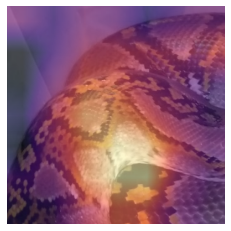

In [69]:
answer=show_heatmap(avg_acts)

In [29]:
 F.softmax(output, dim=-1)

TensorBase([[2.1614e-05, 3.3338e-05, 1.0814e-04, 3.6935e-03, 2.9476e-05, 2.7470e-04, 4.5211e-04, 5.7680e-05, 1.0039e-05, 9.0016e-01, 3.3061e-02, 8.0029e-05, 5.1161e-02, 6.4954e-06, 2.0292e-05,
             3.9923e-03, 2.0501e-03, 6.7144e-05, 2.6850e-04, 1.3244e-04, 8.6801e-05, 4.2304e-03]])

In [30]:
dls.vocab

['Banded Krait', 'Brahminy Blindsnake', 'Buff Striped Keelback', 'Burmese Python', 'Chinese Cobra', 'Chinese Green Snake', 'Chinese Green Tree Viper', 'Common Mock Viper', 'Copperhead Rat Snake', 'Golden Tree Snake', 'Indo-Chinese Rat Snake', 'King Cobra', 'Kramer’s Pit Viper', 'Malayan Pit Viper', 'Many-banded Krait', 'Oriental Ratsnake', 'Oriental Whipsnake', 'Painted Bronzeback', 'Reticulated Python', 'Small-banded Kukri Snake', 'White-lipped Pit Viper', 'Yellow-spotted Keelback']

In [31]:
x.shape

torch.Size([1, 3, 224, 224])

In [ ]:
cam_map = torch.einsum('ck,kij->cij', learn_inf.model[1][-1].weight, act)
cam_map.shape


In [ ]:
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map[1].detach().cpu(), alpha=0.6, extent=(0,224,224,0),
            interpolation='bilinear', cmap='magma');

Object `pytorch.einsum` not found.
